# OpenOptimizers - exercises

Author: Dr. Francesco Calcagno

Date: September 2025

Reference: github.com/francesco-calcagno/OpenOptimizers

## Requirements

Download required python libraries. These are extra to OpenOptimizers' requirements.

In [212]:
! pip install matplotlib  #required for plotting
! pip install rdkit       #required for MM energy minimization

## Exercise 4

Optimizing the geometry of a molecule, i.e. minimizing its energy, is a complicated task also in Molecular Mechanics. In fact, in state-of-the-art force fields (FFs) several interaction intercur as well as multiple parameters are accounted for.

In this exercise we optimize a water molecules using the Universale Force Field as implemented in the RDKit Python library. In plain words, we will define the energy as a function of the Cartesian coordinates of atoms.

In [242]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Geometry import Point3D

In [243]:
def energy(x):
    
    '''
    UFF calculator for H2O molecule.
    '''
    
    mol = Chem.MolFromSmiles("O")               # define water in SMILES string encoding
    mol = Chem.AddHs(mol)                       # add explicit hydrogen atoms
    conf = Chem.Conformer(mol.GetNumAtoms())    # generate a 3D molecular object
    
    coords = np.array(x).reshape(3,3)           # convert optimizer's parameters into Cartesian coordinates
    for i, pos in enumerate(coords):
        conf.SetAtomPosition(i, Point3D(float(pos[0]), float(pos[1]), float(pos[2])))   # generate H2O from Cartesian coords
    mol.AddConformer(conf)

    # Compute the single-point MM energy value
    ff = AllChem.UFFGetMoleculeForceField(mol, confId=0)
    E = ff.CalcEnergy()
    
    return E    

In [ ]:
bounds=(-11., +11.)

# Initial geometry
parameters = [4.43, 0.42, 0.88,     # oxygen
              0.07, -0.40, 0.40,    # hydrogen1
             -0.50,  0.96, 0.90]    # hydrogen2

maxiter = 10000
convergence_threashold=0.001
learning_rate = 0.0001
eps = 1e-8

opt = adam(
    parameters=parameters,
    bounds=bounds,
    maxiter=maxiter,
    random_samples=None,
    convergence_threashold=convergence_threashold,
    window_epochs=3,
    random_state=168548645,
    verbose=False,
)

y_best, x_best, history = opt.minimize(energy)
print(f"Minimum E (kcal/mol) = {y_best:<10.5f} Iterations = {opt.iteration}")


Minimum E (kcal/mol) = 0.00000    Iterations = 2001


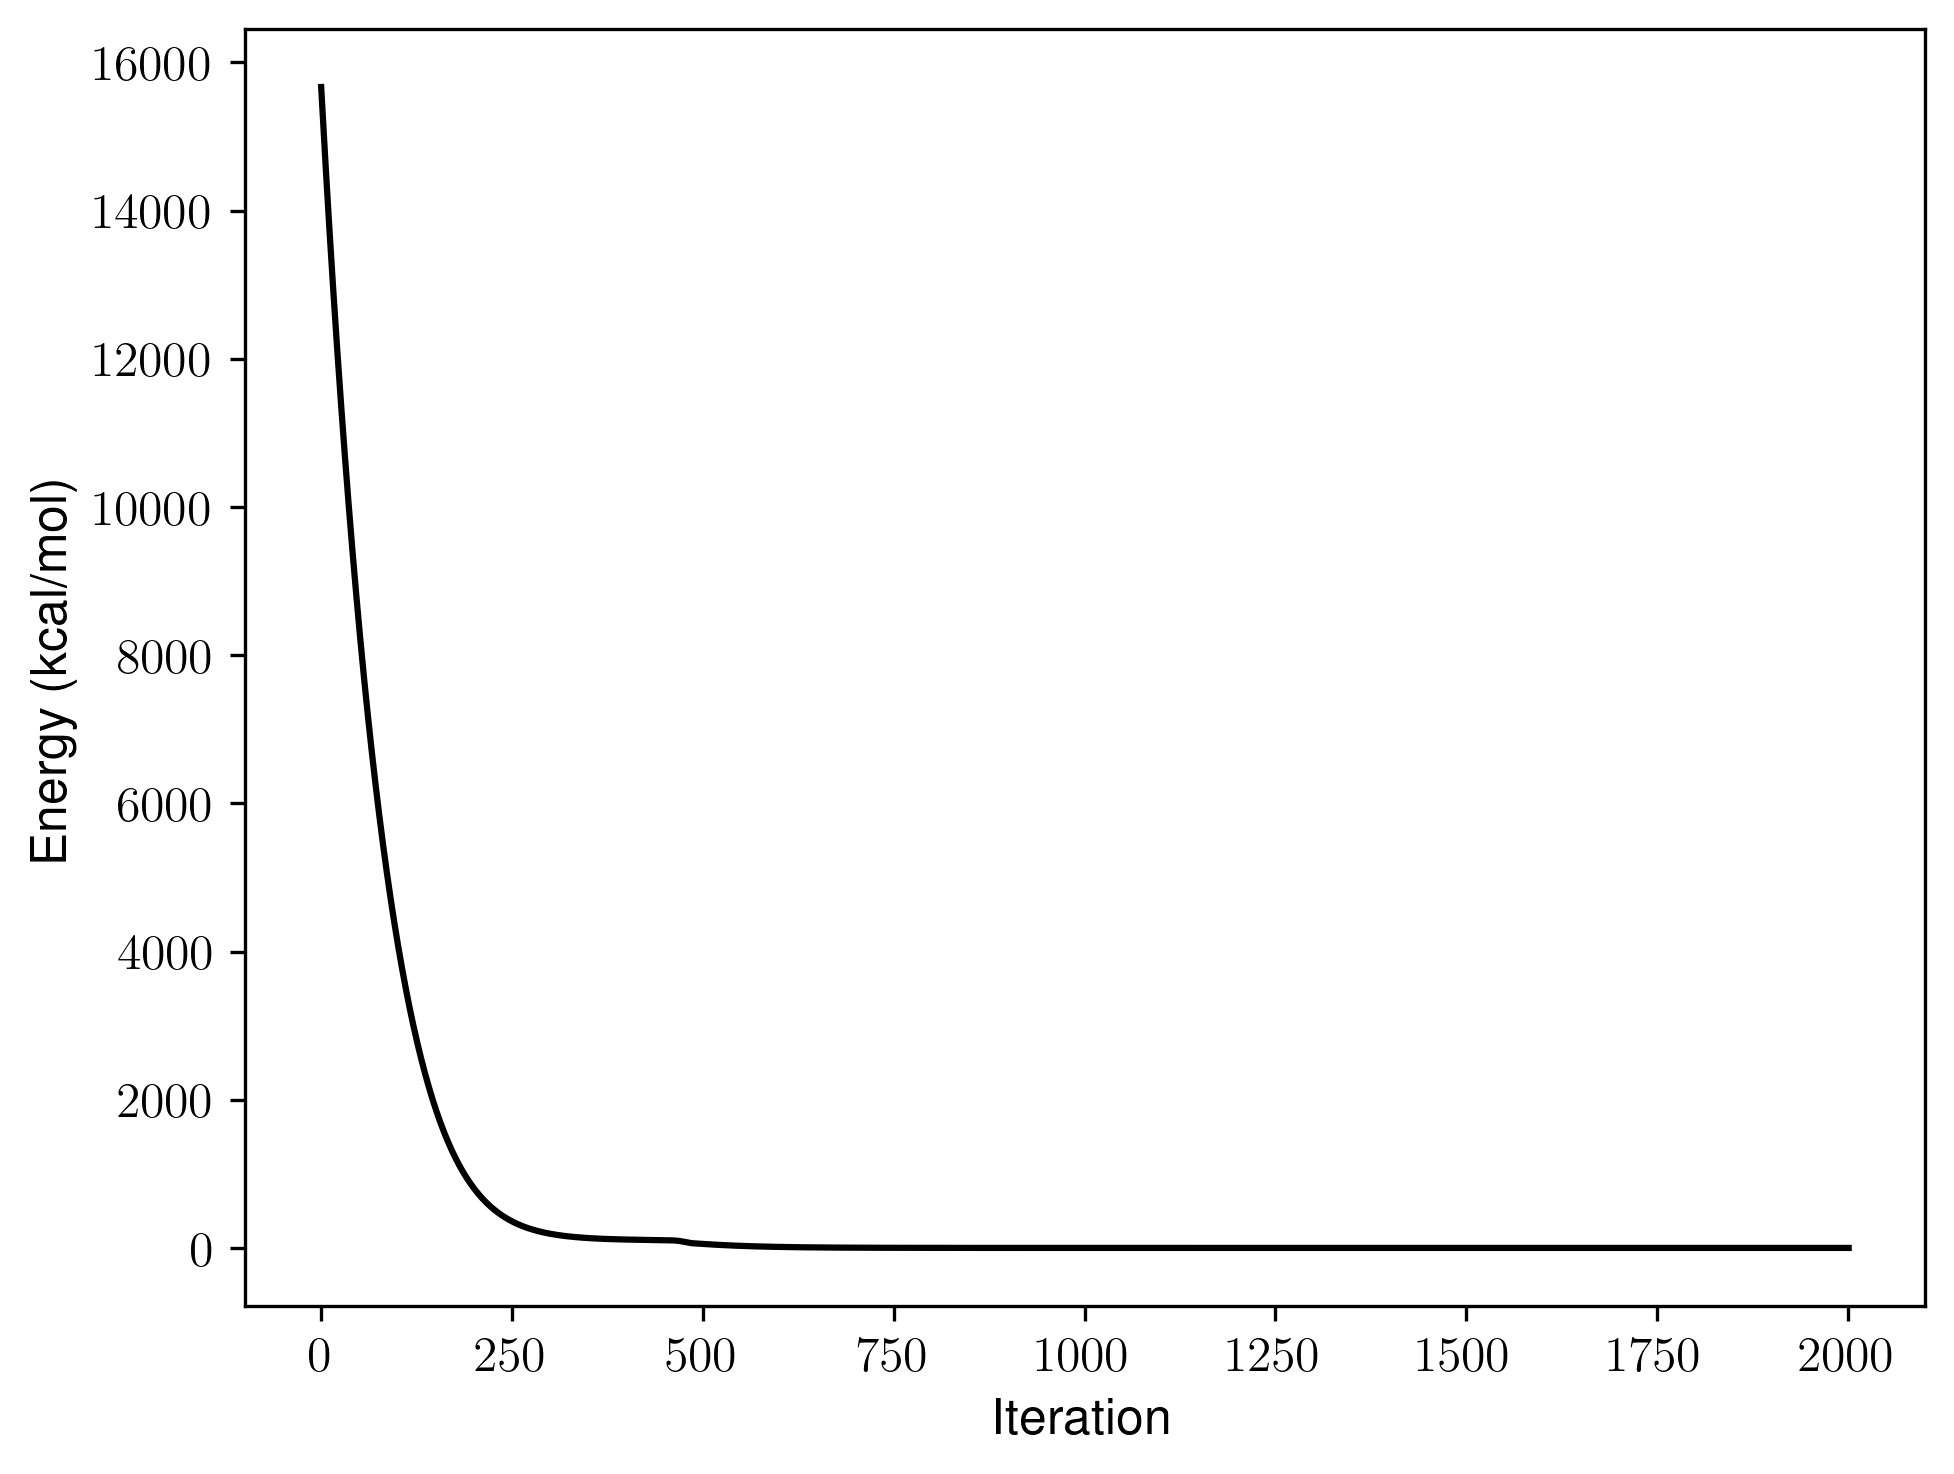

In [245]:
x, y = history["x"], history["y"]
plt.plot(range(len(y)), y, color='black')
plt.xlabel(r'Iteration')
plt.ylabel(r'Energy (kcal/mol)')
plt.savefig('Adam_molecule.png')

Check with a graphical editor how the molecule changed its geometry. Below, you find a code to generate the xyz coordinates.

In [246]:
xyz = x_best.reshape(3,3)

a0, b0, c0 = xyz[0]
a1, b1, c1 = xyz[1]
a2, b2, c2 = xyz[2]

print(f"Cartesian coordinates:\n\n\n3\n\nO {a0} {b0} {c0}\nH {a1} {b1} {c1}\nH {a2} {b2} {c2}")


Cartesian coordinates:


3

O 2.395023963340869 0.25425422222364646 1.0258020699995973
H 1.8412414812385998 0.241961384693546 0.20496271795992757
H 1.7390266752397825 0.26520772641910856 1.7675236982437406


### Questions

- Modify the initial strucutre of the molecule. Does the optimization change?
- Implement an energy function for ethanol. How does the complexity of the problem increase?